In [6]:
from datetime import datetime

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
dataset = pd.read_csv("Dataset/Cleaned_Main_DS.csv")

In [44]:
dataset

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,LOCATION
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,Southwest,377,2,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,624.0,NaN,1100 W 39TH PL
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,Central,163,2,BATTERY - SIMPLE ASSAULT,25,M,Hispanic/Laotianatin/Mexican,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,624.0,NaN,700 S HILL ST
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,Unknown,POLICE FACILITY,NaN,Adult Arrest,845.0,NaN,200 E 6TH ST
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,White,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,745.0,998.0,5400 CORTEEN PL
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,Unknown,BEAUTY SUPPLY STORE,NaN,Invest Cont,740.0,NaN,14400 TITUS ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752906,231510379,05/29/2023 12:00:00 AM,05/25/2023 12:00:00 AM,1100,N Hollywood,1548,2,"BUNCO, GRAND THEFT",25,M,White,OTHER PREMISE,NaN,Invest Cont,662.0,NaN,5300 DENNY AV
752907,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,Foothill,1663,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,Hispanic/Laotianatin/Mexican,"VEHICLE, PASSENGER/TRUCK",NaN,Invest Cont,740.0,NaN,12500 BRANFORD ST
752908,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,Foothill,1602,1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic/Laotianatin/Mexican,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,230.0,NaN,12800 FILMORE ST
752909,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,77th Street,1239,1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,Black,LAUNDROMAT,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,230.0,NaN,6100 S VERMONT AV


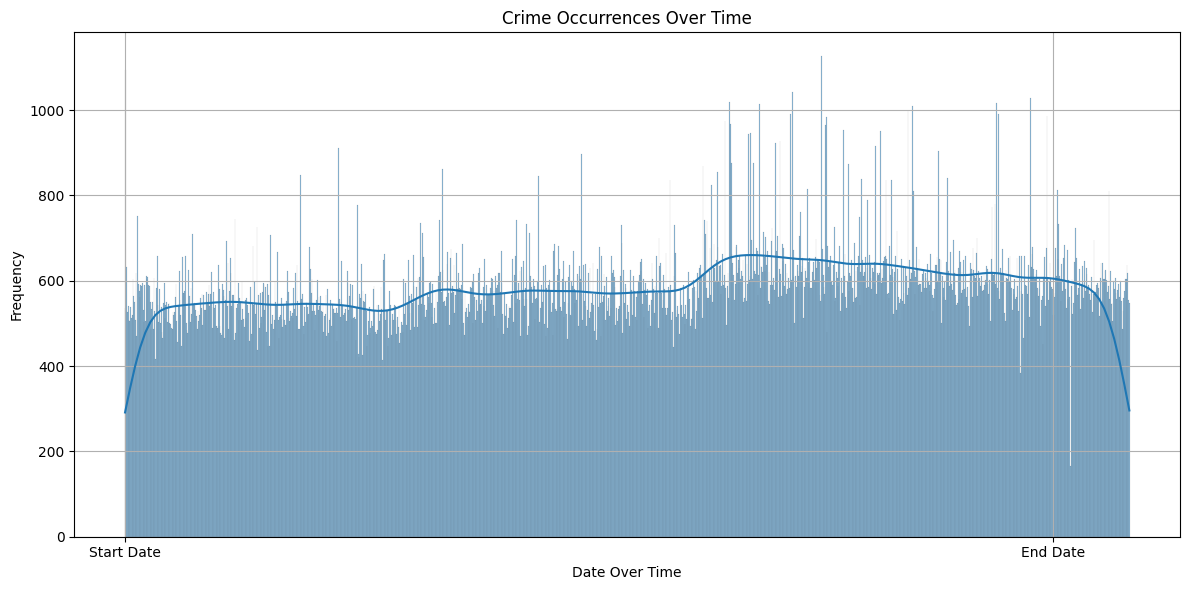

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot(dataset['DATE OCC'], bins=30, kde=True)
plt.title('Crime Occurrences Over Time')
plt.xlabel('Date Over Time')
plt.ylabel('Frequency')
plt.xticks(ticks=[dataset['DATE OCC'].iloc[0], dataset['DATE OCC'].iloc[-1]], labels=['Start Date', 'End Date'])
plt.grid()

plt.tight_layout()
plt.show()

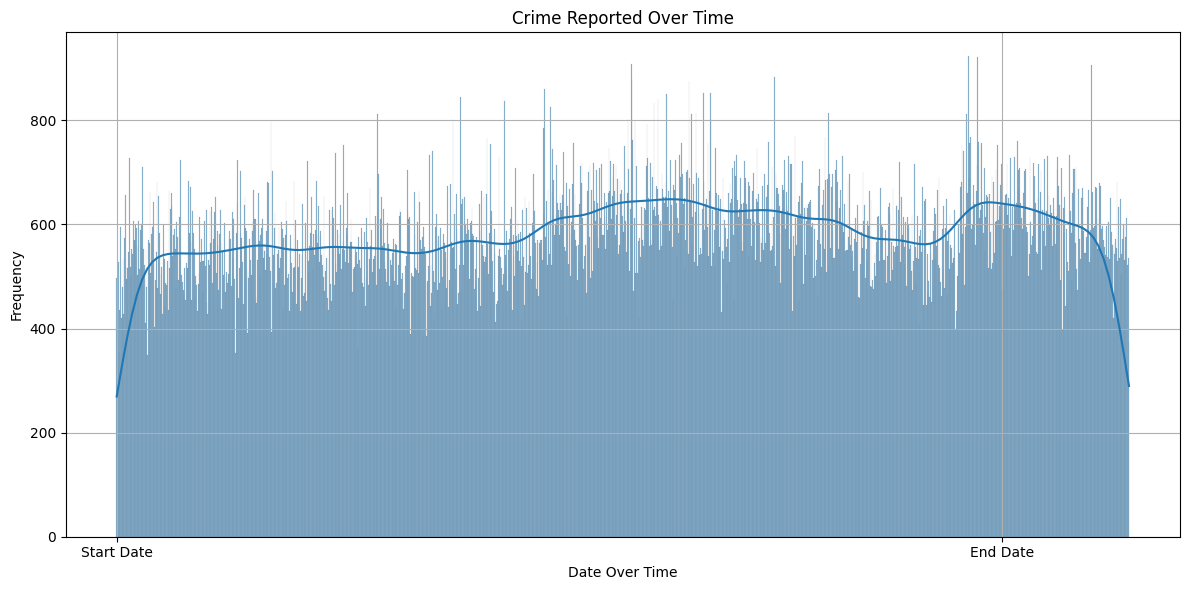

In [46]:
plt.figure(figsize=(12, 6))
sns.histplot(dataset['Date Rptd'], bins=30, kde=True)
plt.title('Crime Reported Over Time')
plt.xlabel('Date Over Time')
plt.ylabel('Frequency')
plt.xticks(ticks=[dataset['DATE OCC'].iloc[0], dataset['DATE OCC'].iloc[-1]], labels=['Start Date', 'End Date'])
plt.grid()

plt.tight_layout()
plt.show()


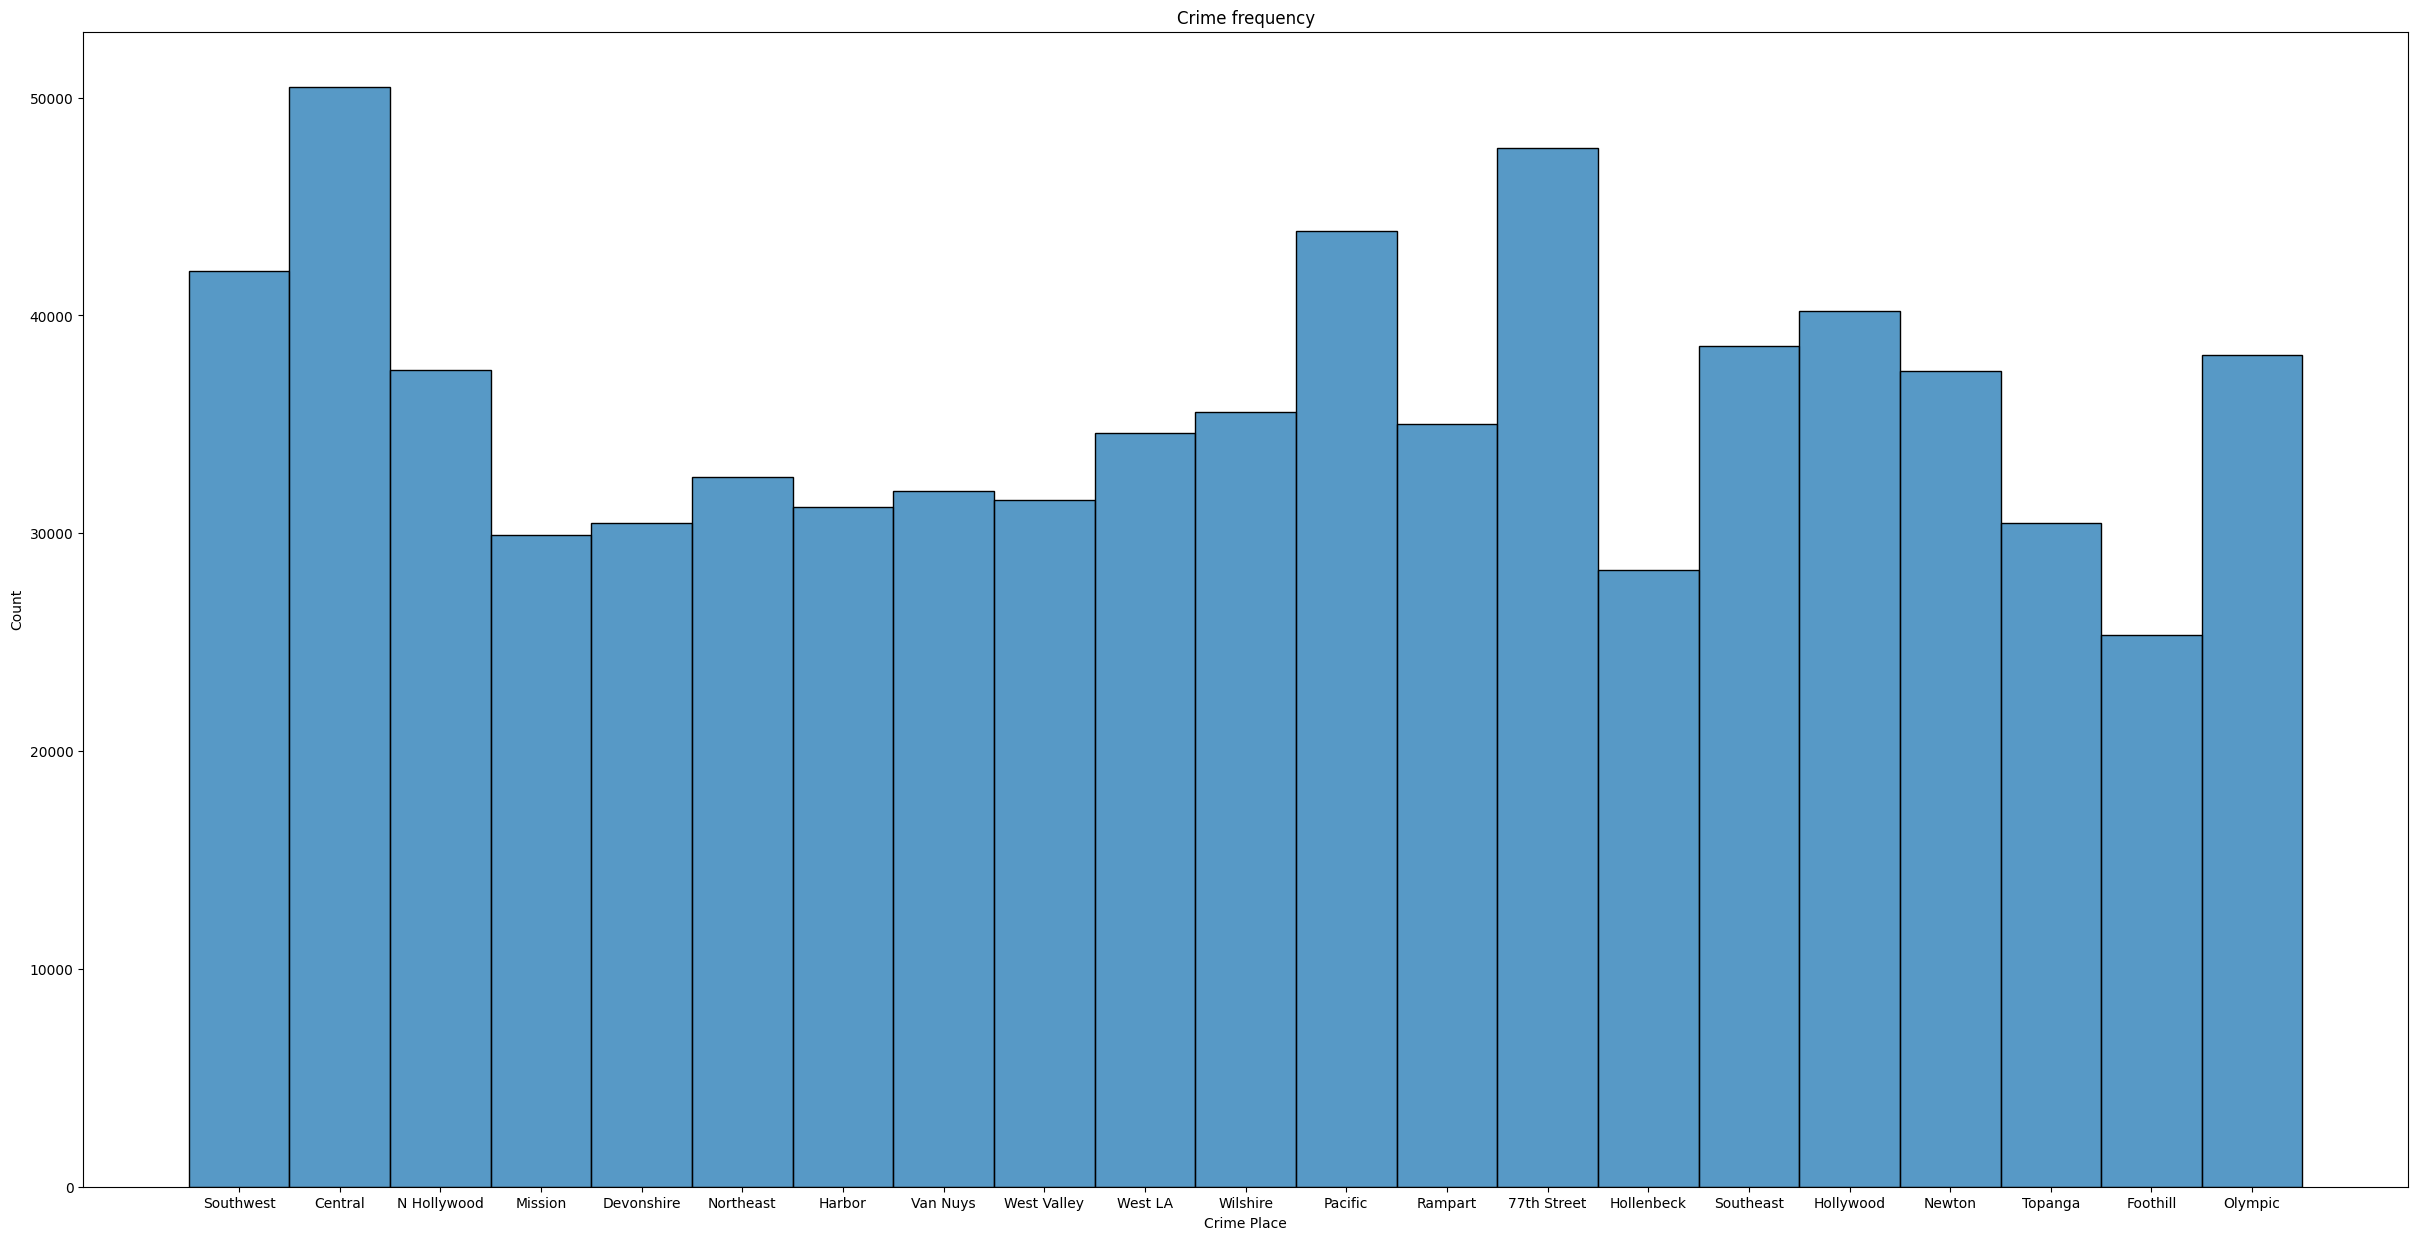

In [47]:
plt.figure(figsize=(30, 15))
sns.histplot(dataset["AREA NAME"])
plt.title("Crime frequency")
plt.xlabel("Crime Place")
plt.ylabel("Count")
plt.show()

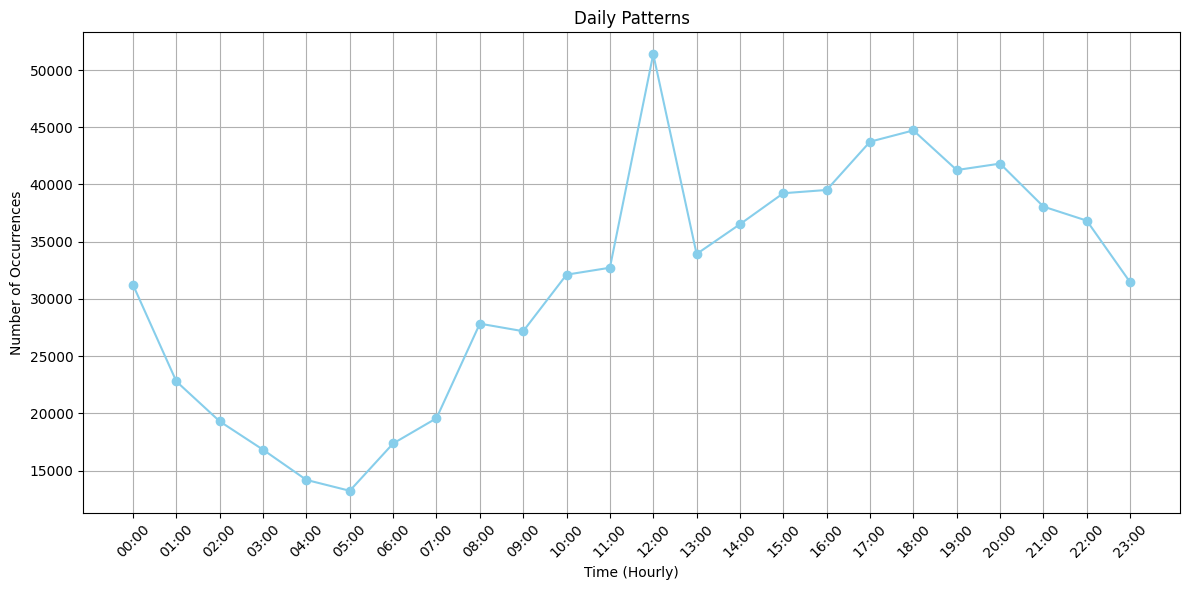

In [48]:
def int_to_time(time_int):
    time_str = str(time_int).zfill(4)
    return datetime.strptime(time_str, "%H%M").time()

dataset['TIME OCC'] = dataset['TIME OCC'].apply(int_to_time)
dataset['TIME OCC'] = pd.to_datetime(dataset['TIME OCC'], format="%H:%M:%S")

dataset['Hour Occ'] = dataset['TIME OCC'].dt.floor('h') 
trend_data = dataset.groupby('Hour Occ').size().reset_index(name='occurrences')
trend_data['Hour Occ'] = trend_data['Hour Occ'].dt.strftime('%H:%M')

plt.figure(figsize=(12, 6))
plt.plot(trend_data['Hour Occ'], trend_data['occurrences'], marker='o', color='skyblue')
plt.title('Daily Patterns')
plt.xlabel('Time (Hourly)')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [57]:

vict_descent_races = dataset['Vict Descent'].unique()
print("Unique races in Vict Descent column:")
print(vict_descent_races)

crime_types = dataset['Crm Cd 1'].unique()
print("\nUnique crimes in Crm Cd Desc column:")
print(crime_types)

pivot_table = pd.crosstab(dataset['Vict Descent'], dataset['Crm Cd 1'])

plt.figure(figsize=(120, 80),facecolor='pink')  
plt.title('Heatmap of Victim Descent vs Crime Type')
sns.heatmap(pivot_table, cmap='coolwarm', annot=False, linecolor='white', linewidths=1)  # Add borders
plt.show()



Unique races in Vict Descent column:
['Black' 'Hispanic/Laotianatin/Mexican' 'Unknown' 'White'
 'Otherther Asian' 'Other' nan 'Chinese' 'Filipino' 'Korean'
 'American Indian/Alaskan Native' 'Vietnamese' 'Asian Indian' 'Japanese'
 'Pacific Islander' 'Samoan' 'Guamanian' 'Hawaiian' 'Cambodian' 'Laotian'
 '-']

Unique crimes in Crm Cd Desc column:
[624. 845. 745. 740. 121. 442. 946. 341. 330. 930. 648. 626. 440. 354.
 210. 230. 310. 510. 420. 761. 236. 662. 350. 860. 480. 623. 956. 900.
 888. 331. 901. 886. 421. 647. 940. 810. 922. 812. 220. 625. 755. 649.
 434. 815. 251. 320. 850. 668. 902. 664. 920. 343. 437. 753. 928. 910.
 760. 762. 661. 351. 821. 237. 903. 813. 666. 820. 627. 805. 763. 441.
 122. 443. 450. 410. 890. 520. 670. 951. 660. 654. 352. 250. 110. 933.
 652. 950. 231. 345. 822. 814. 932. 622. 471. 235. 470. 921. 906. 433.
 651. 943. 653. 436. 439. 806. 949. 522. 446. 113. 438. 451. 521. 485.
 944. 954. 756. 942. 487.  nan 473. 347. 435. 880. 444. 475. 474. 931.
 865. 349. 430